Este archivo consiste en 7600 muestras de prueba de artículos de noticias que contienen 3 columnas. La primera columna es el ID de la clase, la segunda columna es el título y la tercera columna es la descripción. Los IDs de las clases están numerados del 1 al 4, donde el 1 representa Mundo, el 2 representa Deportes, el 3 representa Negocios y el 4 representa Ciencia/Tecnología.

In [ ]:
# Desinstalar versiones anteriores de TensorFlow y Keras sin mostrar salida
%pip uninstall tensorflow keras keras-nightly keras-preprocessing -y > /dev/null 2>&1

# Instalar la versión específica de TensorFlow sin mostrar salida
%pip install tensorflow==2.17 > /dev/null 2>&1


In [ ]:
# Instalar versiones específicas de TensorFlow
!pip uninstall tensorflow keras keras-nightly keras-preprocessing -y
!pip install tensorflow==2.17  # Instalar la versión específica de TensorFlow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
  Using cached tensorflow-2.17.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.17.0 which is incompatible.


In [1]:
import tensorflow as tf

# Verificar versión de TensorFlow
print(f"Versión de TensorFlow: {tf.__version__}")

Versión de TensorFlow: 2.18.0


# MODELO LSTM

In [3]:
# Importar las librerías necesarias
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

Mounted at /content/drive


In [4]:
# Cargar los datos
train = pd.read_csv('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/test.csv')

# Ver las primeras filas del dataset
print("Primeras filas del dataset de entrenamiento:")
print(train.head())

Primeras filas del dataset de entrenamiento:
   Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  


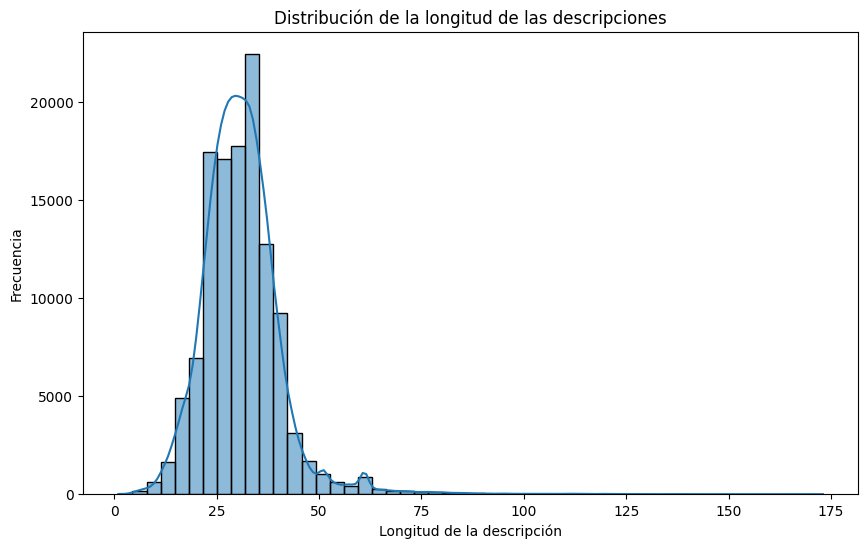

In [6]:
# Seleccionar las columnas necesarias
X_train = train['Description']
y_train = train['Class Index']
X_test = test['Description']
y_test = test['Class Index']

# Analizar la distribución de longitudes en el conjunto de entrenamiento
train_lengths = X_train.apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(train_lengths, kde=True, bins=50)
plt.title("Distribución de la longitud de las descripciones")
plt.xlabel("Longitud de la descripción")
plt.ylabel("Frecuencia")
plt.show()

<ipython-input-8-1ba6dfcd59cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


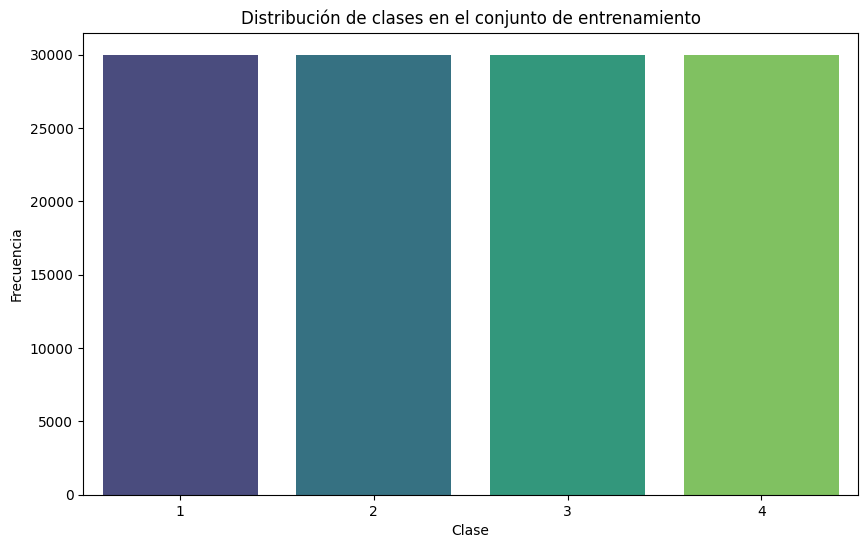

<ipython-input-8-1ba6dfcd59cd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='viridis')


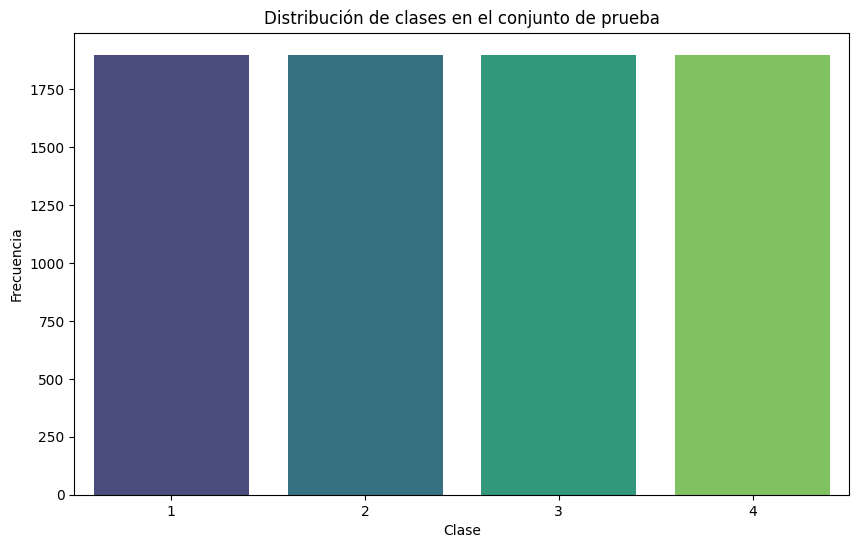

Distribución de clases en el conjunto de entrenamiento:
Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
Class Index
3    1900
4    1900
2    1900
1    1900
Name: count, dtype: int64


In [8]:
# Verificar la uniformidad de las clases
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, palette='viridis')
plt.title("Distribución de clases en el conjunto de prueba")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

# Contar muestras por clase
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())

print("\nDistribución de clases en el conjunto de prueba:")
print(y_test.value_counts())

In [9]:
# Elegir la longitud máxima de las secuencias
max_length = 100  # Puedes ajustar este valor según el análisis

# Configurar el tokenizador
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convertir los textos a secuencias de tokens
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Rellenar las secuencias a una longitud uniforme
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Verificar los valores únicos de las etiquetas
print("Valores únicos en y_train:", np.unique(y_train))
print("Valores únicos en y_test:", np.unique(y_test))

# Convertir las etiquetas a one-hot encoding
num_classes = 4  # Número de clases
y_train_one_hot = to_categorical(y_train - 1, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test - 1, num_classes=num_classes)
# Verificar los valores únicos de las etiquetas
print("Valores únicos en y_train:", np.unique(y_train_one_hot))
print("Valores únicos en y_test:", np.unique(y_test_one_hot))

Valores únicos en y_train: [1 2 3 4]
Valores únicos en y_test: [1 2 3 4]
Valores únicos en y_train: [0. 1.]
Valores únicos en y_test: [0. 1.]


In [11]:
# Imprimir algunas etiquetas one-hot encoding
print("Ejemplo de one-hot encoding en y_train_one_hot:")
print(y_train_one_hot[:5])  # Imprime las primeras 5 etiquetas

print("\nEjemplo de one-hot encoding en y_test_one_hot:")
print(y_test_one_hot[:5])  # Imprime las primeras 5 etiquetas

Ejemplo de one-hot encoding en y_train_one_hot:
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

Ejemplo de one-hot encoding en y_test_one_hot:
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [10]:
# Ajustar las etiquetas para que empiecen desde 0
y_train_labels = y_train - 1
y_test_labels = y_test - 1

# Verificar los valores únicos de las etiquetas ajustadas
print("Valores únicos en y_train_labels:", np.unique(y_train_labels))
print("Valores únicos en y_test_labels:", np.unique(y_test_labels))

Valores únicos en y_train_labels: [0 1 2 3]
Valores únicos en y_test_labels: [0 1 2 3]


In [5]:
# Crear el modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=50000, output_dim=128))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dense(num_classes, activation='softmax'))

In [7]:
# Compilar el modelo
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:

# Entrenar el modelo
model_lstm.fit(X_train_pad, y_train_one_hot, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_one_hot))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 348s 184ms/step - accuracy: 0.2502 - loss: 1.3871 - val_accuracy: 0.2524 - val_loss: 1.3846
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 348s 185ms/step - accuracy: 0.2463 - loss: 1.3847 - val_accuracy: 0.3917 - val_loss: 1.2965
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 384s 187ms/step - accuracy: 0.5873 - loss: 0.9126 - val_accuracy: 0.8899 - val_loss: 0.3428
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 348s 185ms/step - accuracy: 0.9197 - loss: 0.2607 - val_accuracy: 0.9086 - val_loss: 0.2758
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 387s 188ms/step - accuracy: 0.9479 - loss: 0.1624 - val_accuracy: 0.9084 - val_loss: 0.2877


In [10]:
# Imprimir resumen del modelo
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (64, 100, 128)              │       6,400,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (64, 64)                    │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (64, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,349,006 (73.81 MB)

 Trainable params: 6,449,668 (24.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,899,338 (49.21 MB)

In [ ]:
# Guardar el modelo completo en formato .h5
model_lstm.save('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/modelo_lstm02.h5')

print("Modelo guardado correctamente.")

In [2]:
from tensorflow.keras.models import load_model

# Cargar el modelo desde el archivo .h5
model_lstm_loaded = load_model('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/modelo_lstm02.h5')

# Verificar la estructura del modelo cargado
# model_lstm_loaded.summary()


In [5]:
pip install pydot graphviz

In [8]:
import pydot
import graphviz



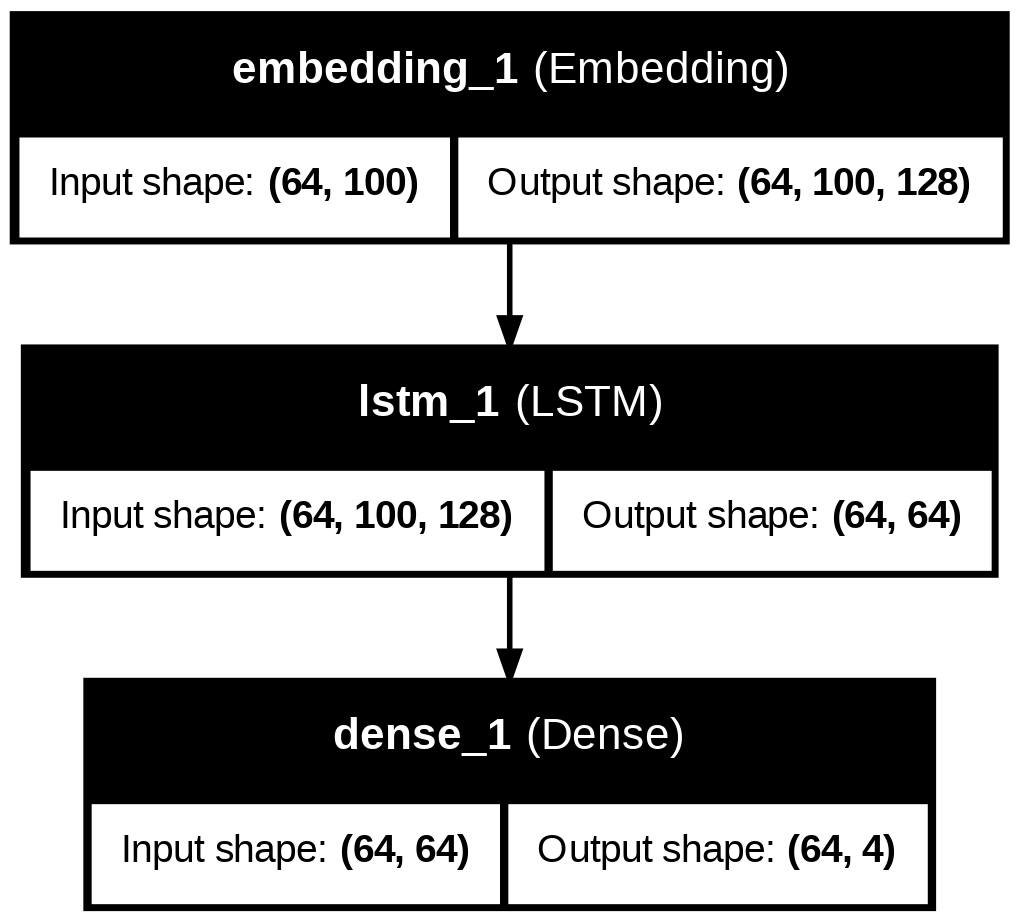

In [10]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

# Cargar el modelo desde el archivo .h5
model_lstm_loaded = load_model('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/modelo_lstm02.h5')

# Generar el diagrama del modelo y guardarlo como PNG
plot_model(model_lstm_loaded, to_file='modelo_LSTM.png', show_shapes=True, show_layer_names=True)





In [11]:
print("El diagrama del modelo ha sido guardado como 'modelo_lstm.png'.")


El diagrama del modelo ha sido guardado como 'modelo_lstm.png'.


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


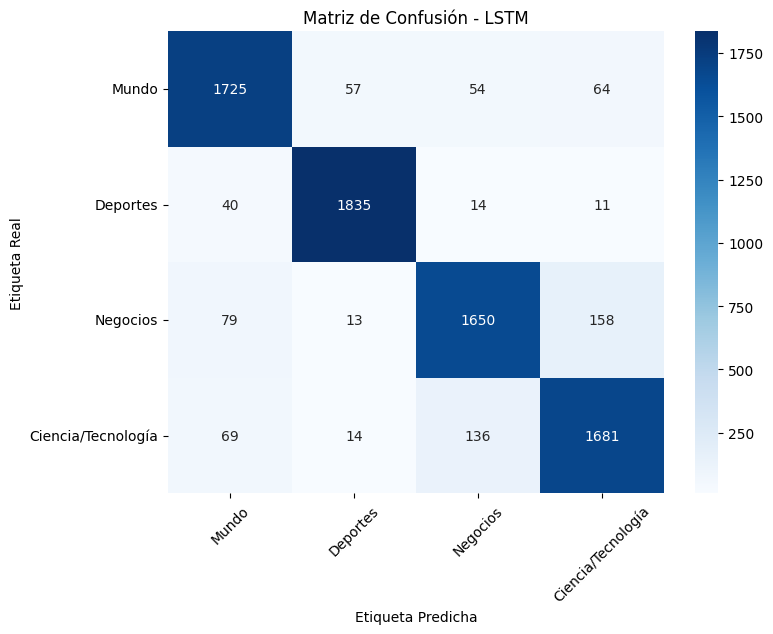

                    precision    recall  f1-score   support

             Mundo       0.90      0.91      0.90      1900
          Deportes       0.96      0.97      0.96      1900
          Negocios       0.89      0.87      0.88      1900
Ciencia/Tecnología       0.88      0.88      0.88      1900

          accuracy                           0.91      7600
         macro avg       0.91      0.91      0.91      7600
      weighted avg       0.91      0.91      0.91      7600



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Definir las clases
clases = {0: 'Mundo', 1: 'Deportes', 2: 'Negocios', 3: 'Ciencia/Tecnología'}

# Paso 1: Predecir etiquetas de clase
y_pred_probs = model_lstm_loaded.predict(X_test_pad)  # Obtiene probabilidades de cada clase
y_pred = np.argmax(y_pred_probs, axis=1)  # Convierte a etiquetas enteras

# Paso 2: Convertir y_test_one_hot a etiquetas enteras
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Paso 3: Generar la matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred)

# Paso 4: Graficar la matriz de confusión con etiquetas correctas
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[clases[i] for i in np.unique(y_test_labels)],
            yticklabels=[clases[i] for i in np.unique(y_test_labels)])
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión - LSTM")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad
plt.yticks(rotation=0)
plt.show()

# Reporte de clasificación (precisión, recall, F1-score)
print(classification_report(y_test_labels, y_pred, target_names=[clases[i] for i in np.unique(y_test_labels)]))


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Verificar que el modelo y el tokenizer están cargados
if 'model_lstm_loaded' not in globals():
    raise ValueError("El modelo no está cargado. Asegúrate de ejecutar load_model correctamente.")

if 'tokenizer' not in globals():
    raise ValueError("El tokenizer no está definido. Asegúrate de cargar el tokenizer antes de usarlo.")

# Definir las clases
clases = {0: 'Mundo', 1: 'Deportes', 2: 'Negocios', 3: 'Ciencia/Tecnología'}

# Texto de prueba
texto_prueba = """When did life begin? One evidential clue stems from the fossil records in Western Australia,
although whether these layered sediments are biological or chemical has spawned a spirited debate.
Oxford researcher, Nicola McLoughlin, describes some of the issues in contention."""

# Preprocesar el texto (tokenización y padding)
texto_secuencia = tokenizer.texts_to_sequences([texto_prueba])

# Verificar si el texto tiene tokens válidos
if not texto_secuencia or all(len(seq) == 0 for seq in texto_secuencia):
    raise ValueError("El texto ingresado no produjo tokens válidos. Revisa el tokenizer o el texto.")

texto_pad = pad_sequences(texto_secuencia, maxlen=max_length, padding='post', truncating='post')

# Realizar la predicción
prediccion = model_lstm_loaded.predict(texto_pad)
clase_predicha = np.argmax(prediccion, axis=1)[0]  # Obtener la clase con mayor probabilidad

# Verificar si la clase predicha es válida
if clase_predicha not in clases:
    raise ValueError(f"Clase predicha inválida: {clase_predicha}. Verifica el modelo y las etiquetas.")

# Mostrar la clase predicha
print(f"Texto ingresado: {texto_prueba}")
print(f"Clase predicha: {clases[clase_predicha]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Texto ingresado: When did life begin? One evidential clue stems from the fossil records in Western Australia,
although whether these layered sediments are biological or chemical has spawned a spirited debate.
Oxford researcher, Nicola McLoughlin, describes some of the issues in contention.
Clase predicha: Ciencia/Tecnología


In [10]:
%pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [11]:
import gradio as gr
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import re

# Clase para validar el texto
class TextValidator:
    def validate(self, text):
        if len(text.strip()) < 3:
            return False
        if not re.match(r"^[a-zA-Z0-9ñÑáéíóúÁÉÍÓÚüÜ\s.,!?-]+$", text):
            return False
        if text.strip().isdigit():
            return False
        return True

# Verificar que el modelo y el tokenizer están cargados
if 'model_lstm_loaded' not in globals():
    raise ValueError("El modelo no está cargado. Asegúrate de ejecutar load_model correctamente.")

if 'tokenizer' not in globals():
    raise ValueError("El tokenizer no está definido. Asegúrate de cargar el tokenizer antes de usarlo.")

# Definir las clases (ajustadas a índices desde 0)
clases = {0: 'Mundo', 1: 'Deportes', 2: 'Negocios', 3: 'Ciencia/Tecnología'}

# Instanciar el validador de texto
validador = TextValidator()

# Función para realizar la predicción
def predecir_clase(texto):
    try:
        # Validar el texto ingresado
        if not validador.validate(texto):
            return "Error: El texto no es válido. Asegúrate de que tenga al menos 3 caracteres y solo contenga caracteres permitidos."

        # Preprocesar el texto ingresado
        texto_secuencia = tokenizer.texts_to_sequences([texto])

        # Verificar si el texto tiene tokens válidos
        if not texto_secuencia or all(len(seq) == 0 for seq in texto_secuencia):
            return "Error: No se generaron tokens válidos. Intenta con otro texto."

        texto_pad = pad_sequences(texto_secuencia, maxlen=max_length, padding='post', truncating='post')

        # Realizar la predicción
        prediccion = model_lstm_loaded.predict(texto_pad)
        clase_predicha = np.argmax(prediccion, axis=1)[0]  # Obtener la clase con mayor probabilidad

        # Verificar si la clase predicha es válida
        if clase_predicha not in clases:
            return f"Error: Clase predicha inválida ({clase_predicha}). Verifica el modelo."

        return f"Clase predicha: {clases[clase_predicha]}"

    except Exception as e:
        return f"Error en la predicción: {str(e)}"

# Crear la interfaz con Gradio
descripcion = "Ingrese un artículo o fragmento de texto para clasificarlo en una de las siguientes categorías: Mundo, Deportes, Negocios, Ciencia/Tecnología."

gr.Interface(
    fn=predecir_clase,
    inputs=gr.Textbox(lines=5, placeholder="Escribe aquí el texto a clasificar"),
    outputs=gr.Textbox(label="Resultado de la clasificación"),
    title="Clasificación de Artículos de Noticias",
    description=descripcion,
    theme="compact",
    allow_flagging="never"  # Desactiva el sistema de reportes de Gradio si no es necesario
).launch(share=True)  # `share=True` para generar un enlace público temporal


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/blocks.py:1088: UserWarning: Cannot load compact. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/compact (Request ID: Root=1-67a8d249-6b26b0e34f3744e9751f9131;24f8ad30-715e-4707-b019-f03c20fcff63)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")
/usr/local/lib/python3.11/dist-packages/gradio/interface.py:403: UserWarning

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0f09752cb0f5716af3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## MODELO GRU

Mounted at /content/drive
Primeras filas del dataset de entrenamiento:
   Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  


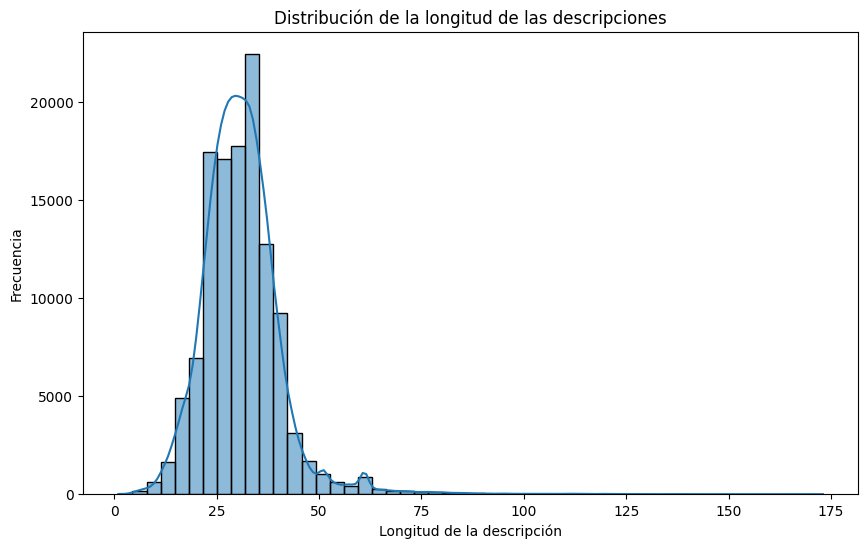

Valores únicos en y_train: [1 2 3 4]
Valores únicos en y_test: [1 2 3 4]
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.2508 - loss: 1.3871 - val_accuracy: 0.2522 - val_loss: 1.3860
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.3204 - loss: 1.2826 - val_accuracy: 0.8939 - val_loss: 0.3290
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9188 - loss: 0.2522 - val_accuracy: 0.9124 - val_loss: 0.2618
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9526 - loss: 0.1460 - val_accuracy: 0.9114 - val_loss: 0.2742
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9696 - loss: 0.0941 - val_accuracy: 0.9100 - val_loss: 0.2961


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (64, 100, 128)              │       6,400,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (64, 64)                    │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (64, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,312,526 (73.67 MB)

 Trainable params: 6,437,508 (24.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,875,018 (49.11 MB)

In [ ]:
# Importar las librerías necesarias
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

# Montar Google Drive
drive.mount('/content/drive')

# Cargar los datos
train = pd.read_csv('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/test.csv')

# Ver las primeras filas del dataset
print("Primeras filas del dataset de entrenamiento:")
print(train.head())

# Seleccionar las columnas necesarias
X_train = train['Description']
y_train = train['Class Index']
X_test = test['Description']
y_test = test['Class Index']

# Analizar la distribución de longitudes en el conjunto de entrenamiento
train_lengths = X_train.apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(train_lengths, kde=True, bins=50)
plt.title("Distribución de la longitud de las descripciones")
plt.xlabel("Longitud de la descripción")
plt.ylabel("Frecuencia")
plt.show()

# Elegir la longitud máxima de las secuencias
max_length = 100  # Puedes ajustar

# Configurar el tokenizador
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convertir los textos a secuencias de tokens
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Rellenar las secuencias a una longitud uniforme
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Verificar los valores únicos de las etiquetas
print("Valores únicos en y_train:", np.unique(y_train))
print("Valores únicos en y_test:", np.unique(y_test))

# Convertir las etiquetas a one-hot encoding
num_classes = 4  # Número de clases
y_train_one_hot = to_categorical(y_train - 1, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test - 1, num_classes=num_classes)

# Crear el modelo GRU
model_gru = Sequential()
model_gru.add(Embedding(input_dim=50000, output_dim=128))
model_gru.add(GRU(64, return_sequences=False))
model_gru.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_gru.fit(X_train_pad, y_train_one_hot, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_one_hot))

# Imprimir resumen del modelo
model_gru.summary()


In [ ]:
model_gru.save('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/modelo_gru.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo desde el archivo .h5
model_GRU_loaded = load_model('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/modelo_gru.h5')

# Verificar la estructura del modelo cargado
# model_GRU_loaded.summary()


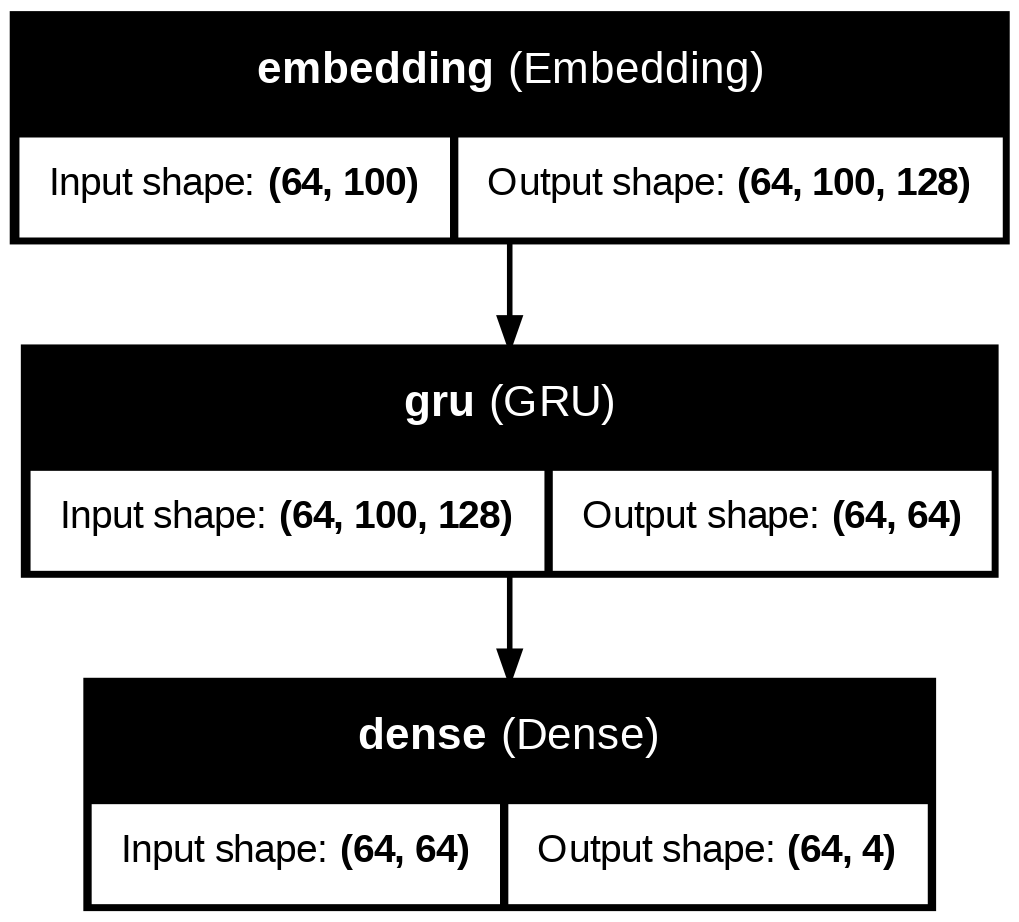

In [12]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

# Cargar el modelo desde el archivo .h5
model_gru_loaded = load_model('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/modelo_gru.h5')

# Generar el diagrama del modelo y guardarlo como PNG
plot_model(model_gru_loaded, to_file='modelo_GRU.png', show_shapes=True, show_layer_names=True)




In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

# Cargar el modelo desde el archivo .h5
model_GRU_loaded = load_model('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/modelo_gru.h5')

# Generar el diagrama del modelo y guardarlo como PNG
plot_model(model_GRU_loaded, to_file='modelo_gru.png', show_shapes=True, show_layer_names=True)

print("El diagrama del modelo ha sido guardado como 'modelo_gru.png'.")


238/238 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step


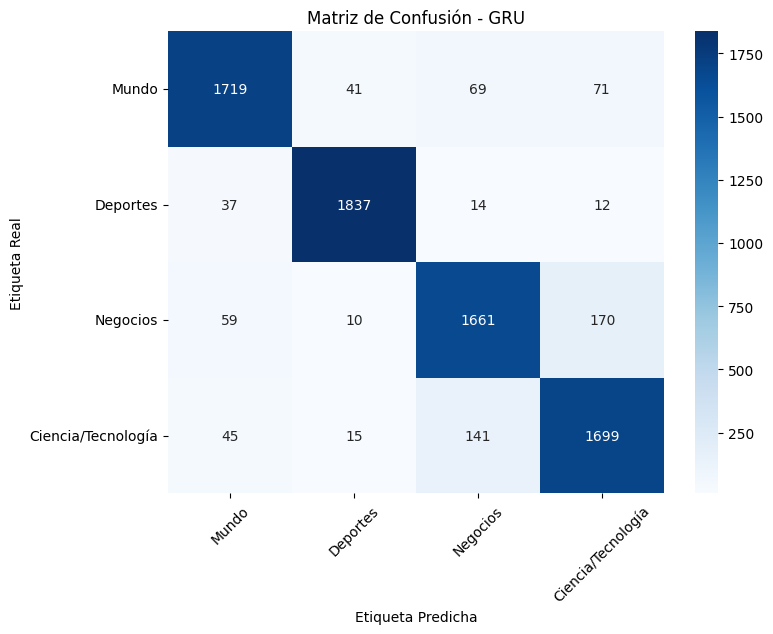

                    precision    recall  f1-score   support

             Mundo       0.92      0.90      0.91      1900
          Deportes       0.97      0.97      0.97      1900
          Negocios       0.88      0.87      0.88      1900
Ciencia/Tecnología       0.87      0.89      0.88      1900

          accuracy                           0.91      7600
         macro avg       0.91      0.91      0.91      7600
      weighted avg       0.91      0.91      0.91      7600



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Definir las clases
clases = {0: 'Mundo', 1: 'Deportes', 2: 'Negocios', 3: 'Ciencia/Tecnología'}

# Paso 1: Predecir etiquetas de clase
y_pred_probs = model_GRU_loaded.predict(X_test_pad)  # Obtiene probabilidades de cada clase
y_pred = np.argmax(y_pred_probs, axis=1)  # Convierte a etiquetas enteras

# Paso 2: Convertir y_test_one_hot a etiquetas enteras
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Paso 3: Generar la matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred)

# Paso 4: Graficar la matriz de confusión con etiquetas correctas
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[clases[i] for i in np.unique(y_test_labels)],
            yticklabels=[clases[i] for i in np.unique(y_test_labels)])
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión - GRU")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad
plt.yticks(rotation=0)
plt.show()

# Reporte de clasificación (precisión, recall, F1-score)
print(classification_report(y_test_labels, y_pred, target_names=[clases[i] for i in np.unique(y_test_labels)]))

In [ ]:
# Cargar el modelo GRU guardado
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Definir las clases
clases = {1: 'Mundo', 2: 'Deportes', 3: 'Negocios', 4: 'Ciencia/Tecnología'}

# Configuración del tokenizador y longitud máxima
max_length = 100  # Debes usar el mismo valor que usaste durante el preprocesamiento

# Si tienes guardado el 'tokenizer', deberías cargarlo o definirlo nuevamente
# Asegúrate de tener el mismo tokenizador usado al entrenar el modelo
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
train = pd.read_csv('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/train.csv')
tokenizer.fit_on_texts(train['Description'])

# Función para predecir la clase del texto
def predecir_clase_gru(texto):
    # Convertir el texto a secuencia de tokens
    texto_secuencia = tokenizer.texts_to_sequences([texto])

    # Rellenar las secuencias a una longitud uniforme
    texto_pad = pad_sequences(texto_secuencia, maxlen=max_length, padding='post', truncating='post')

    # Realizar la predicción
    prediccion = model_gru.predict(texto_pad)
    clase_predicha = np.argmax(prediccion, axis=1)[0] + 1  # Obtener la clase con mayor probabilidad

    # Devolver el nombre de la clase
    return clases[clase_predicha]

# Texto de prueba
texto_prueba = "When did life begin? One evidential clue stems from the fossil records in Western Australia, although whether these layered sediments are biological or chemical has spawned a spirited debate. Oxford researcher, Nicola McLoughlin, describes some of the issues in contention."

# Predecir la clase del texto
clase_predicha = predecir_clase_gru(texto_prueba)
print(f"La clase predicha para el texto es: {clase_predicha}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
La clase predicha para el texto es: Ciencia/Tecnología


# Modelo 1: Transformer Básico con una Capa de Atención Multi-Cabeza

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np

# Cargar los datos (asegurate de que los archivos CSV estén en la ruta correcta)
train = pd.read_csv('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/test.csv')

# Seleccionar las columnas necesarias
X_train = train['Description']
y_train = train['Class Index']
X_test = test['Description']
y_test = test['Class Index']

# Configurar el tokenizador
max_length = 100  # Puedes ajustar este valor según el análisis
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convertir los textos a secuencias de tokens
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Rellenar las secuencias a una longitud uniforme
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Convertir las etiquetas a one-hot encoding
num_classes = 4
y_train_one_hot = to_categorical(y_train - 1, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test - 1, num_classes=num_classes)

# Crear el modelo Transformer básico
inputs = layers.Input(shape=(max_length,))
embedding = layers.Embedding(input_dim=50000, output_dim=128)(inputs)

# Capa de atención multi-cabeza
attention = layers.MultiHeadAttention(num_heads=1, key_dim=128)(embedding, embedding)

# Capa de normalización y un MLP
x = layers.LayerNormalization()(attention)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Definir el modelo
model_transformer_1 = models.Model(inputs=inputs, outputs=outputs)

# Compilar el modelo
model_transformer_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model_transformer_1.fit(X_train_pad, y_train_one_hot, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_one_hot))

# Mostrar el resumen del modelo
model_transformer_1.summary()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 336s 177ms/step - accuracy: 0.7727 - loss: 0.5429 - val_accuracy: 0.9095 - val_loss: 0.2744
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 375s 174ms/step - accuracy: 0.9378 - loss: 0.1848 - val_accuracy: 0.9108 - val_loss: 0.2827
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 376s 171ms/step - accuracy: 0.9542 - loss: 0.1249 - val_accuracy: 0.9017 - val_loss: 0.3161
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 320s 170ms/step - accuracy: 0.9655 - loss: 0.0897 - val_accuracy: 0.8997 - val_loss: 0.4101
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 329s 173ms/step - accuracy: 0.9718 - loss: 0.0702 - val_accuracy: 0.8992 - val_loss: 0.4425


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 100, 128)       │      6,400,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 100, 128)       │         66,048 │ embedding[0][0],       │
│ (MultiHeadAttention)      │                        │                │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 100, 128)       │            256 │ multi_head_attention[… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 128)            │              0 │ layer_normalization[0… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         16,512 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 4)              │            516 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 19,449,998 (74.20 MB)

 Trainable params: 6,483,332 (24.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,966,666 (49.46 MB)

In [ ]:
model_transformer_1.save('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/modelo_transformer_1head.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo desde el archivo .h5
model_transformer_1head_loaded = load_model('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/modelo_transformer_1head.h5')



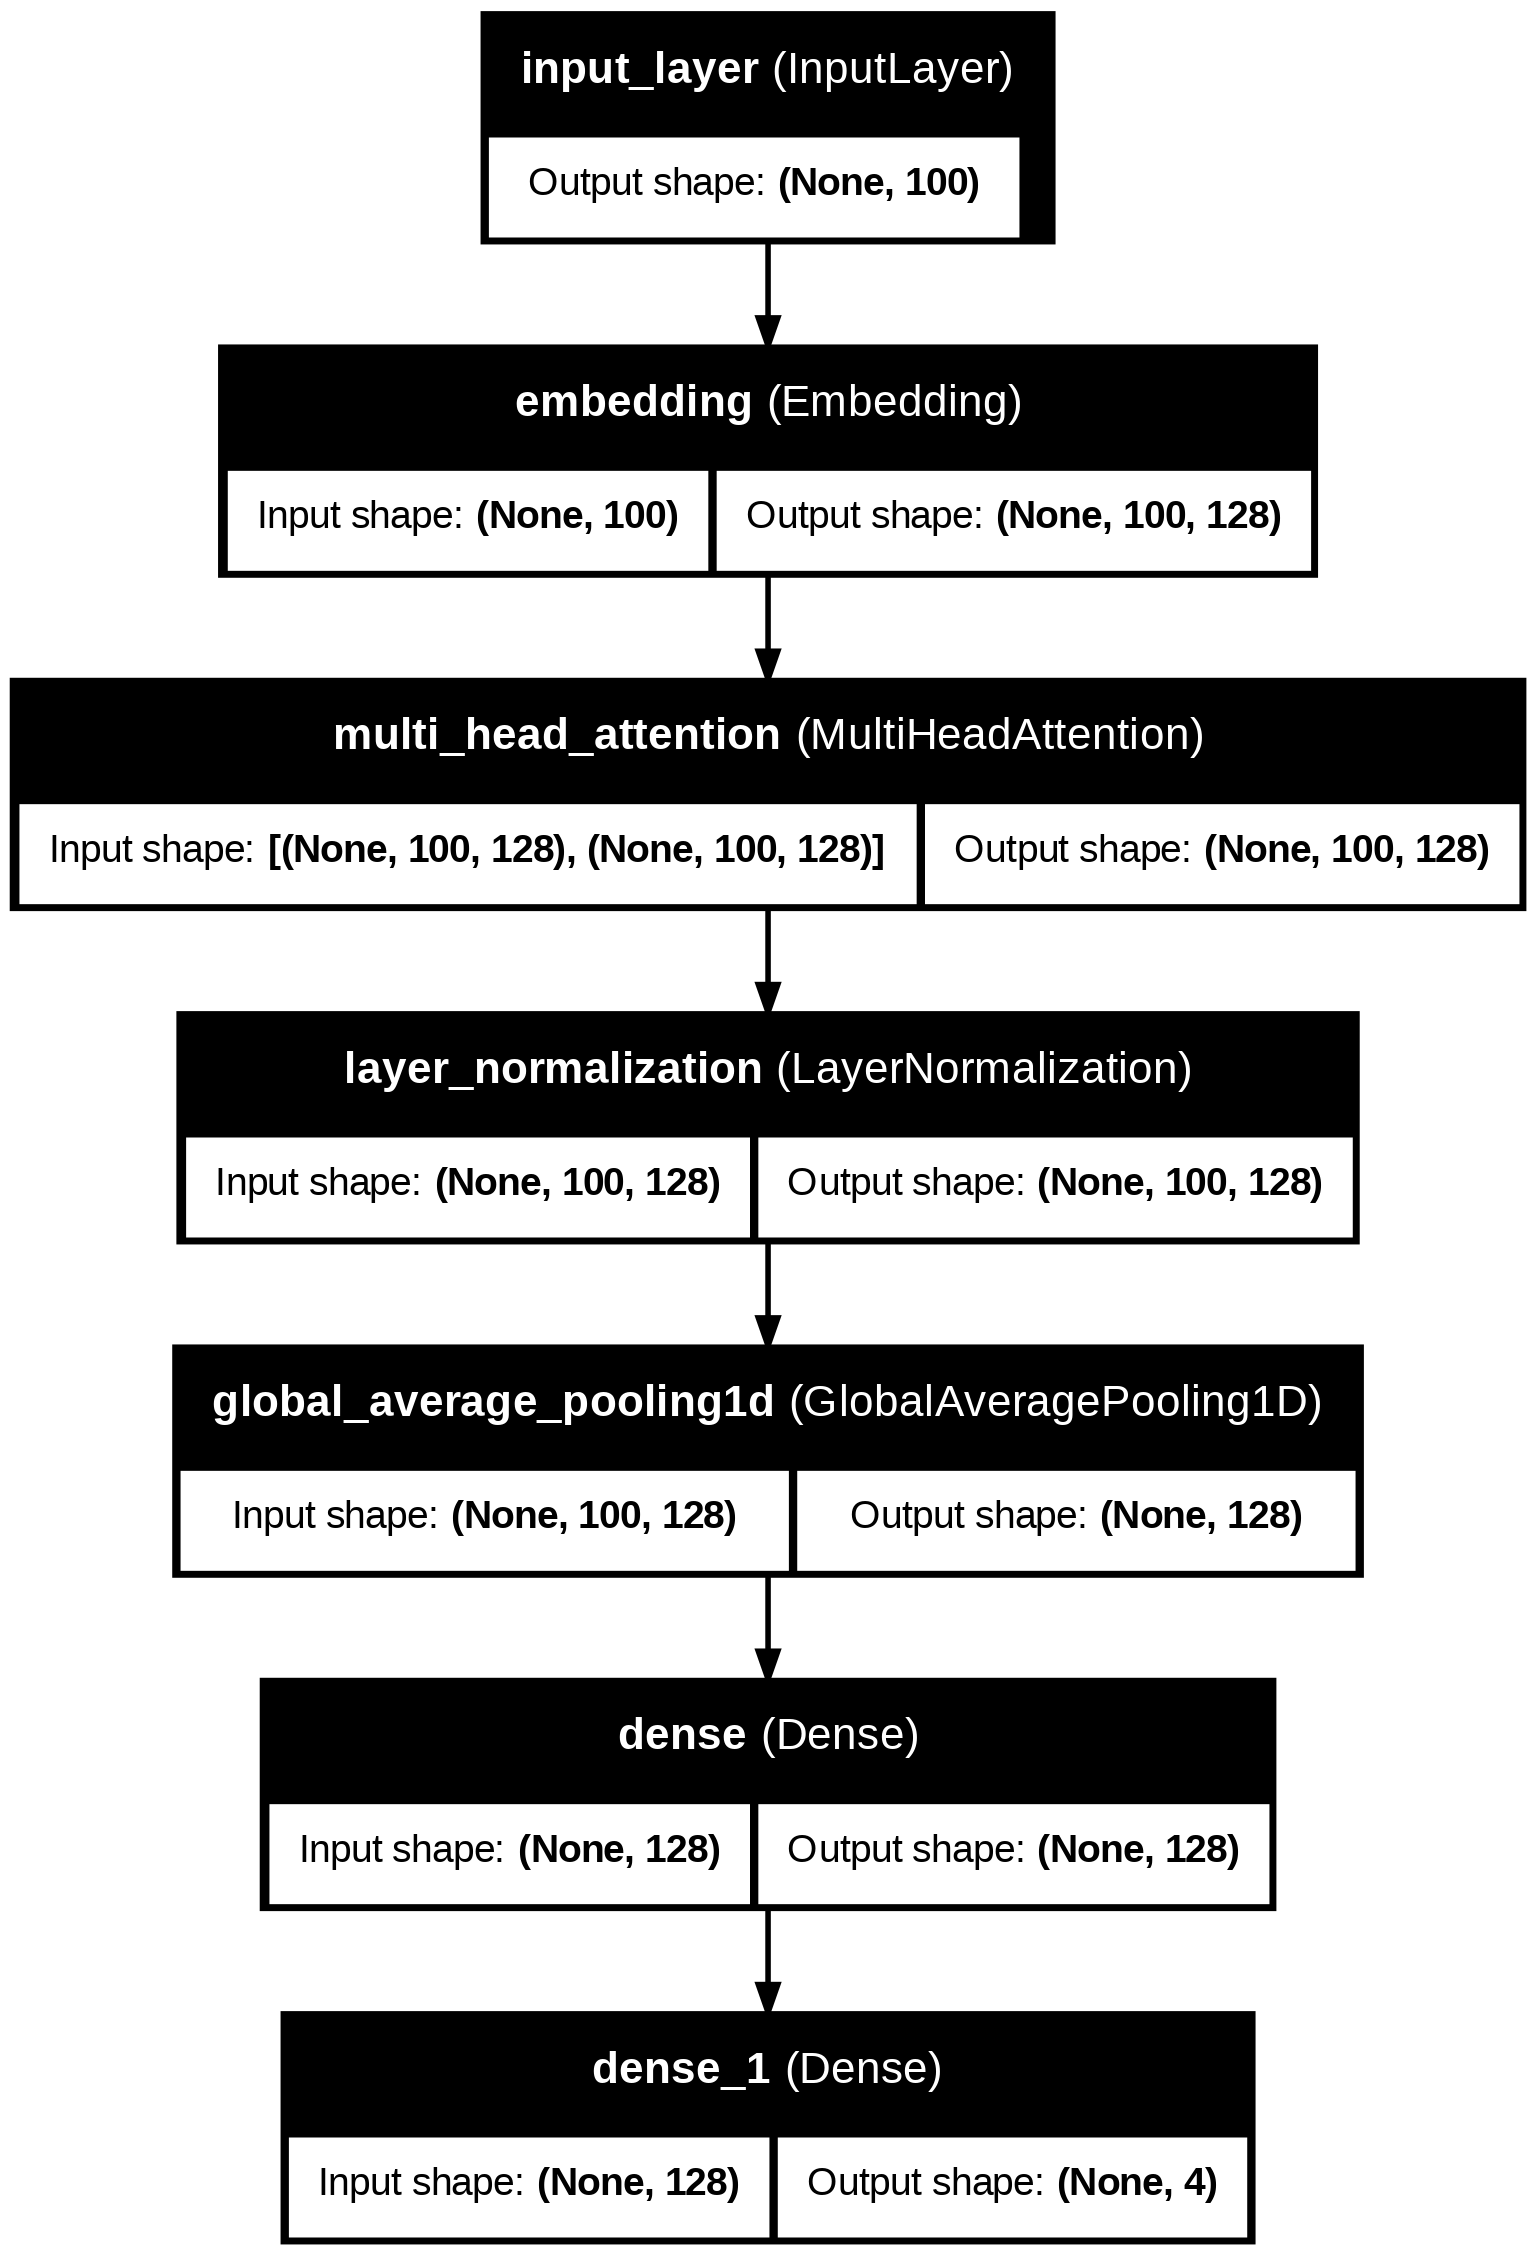

In [14]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

# Cargar el modelo
model_transformer_1head_loaded = load_model('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/modelo_transformer_1head.h5')

# Guardar el diagrama en un lugar accesible
output_path = "/content/modelo_transformer_1head.png"
plot_model(model_transformer_1head_loaded, to_file=output_path, show_shapes=True, show_layer_names=True)

238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step


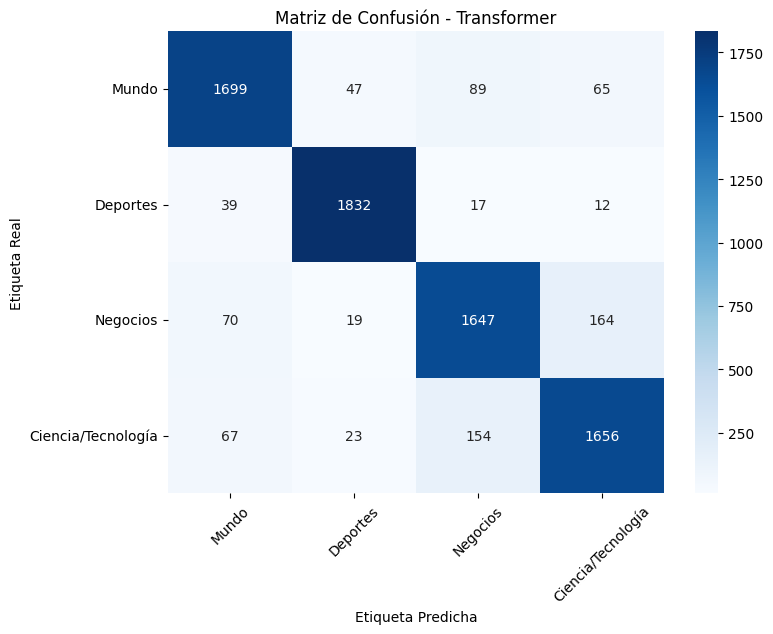

                    precision    recall  f1-score   support

             Mundo       0.91      0.89      0.90      1900
          Deportes       0.95      0.96      0.96      1900
          Negocios       0.86      0.87      0.87      1900
Ciencia/Tecnología       0.87      0.87      0.87      1900

          accuracy                           0.90      7600
         macro avg       0.90      0.90      0.90      7600
      weighted avg       0.90      0.90      0.90      7600



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Definir las clases
clases = {0: 'Mundo', 1: 'Deportes', 2: 'Negocios', 3: 'Ciencia/Tecnología'}

# Paso 1: Predecir etiquetas de clase
y_pred_probs = model_transformer_1head_loaded.predict(X_test_pad)  # Obtiene probabilidades de cada clase
y_pred = np.argmax(y_pred_probs, axis=1)  # Convierte a etiquetas enteras

# Paso 2: Convertir y_test_one_hot a etiquetas enteras
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Paso 3: Generar la matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred)

# Paso 4: Graficar la matriz de confusión con etiquetas correctas
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[clases[i] for i in np.unique(y_test_labels)],
            yticklabels=[clases[i] for i in np.unique(y_test_labels)])
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión - Transformer")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad
plt.yticks(rotation=0)
plt.show()

# Reporte de clasificación (precisión, recall, F1-score)
print(classification_report(y_test_labels, y_pred, target_names=[clases[i] for i in np.unique(y_test_labels)]))

In [ ]:
# Cargar el modelo Transformer guardado
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd

# Definir las clases
clases = {1: 'Mundo', 2: 'Deportes', 3: 'Negocios', 4: 'Ciencia/Tecnología'}

# Configuración del tokenizador y longitud máxima
max_length = 100  # Debes usar el mismo valor que usaste durante el preprocesamiento

# Si tienes guardado el 'tokenizer', deberías cargarlo o definirlo nuevamente
# Asegúrate de tener el mismo tokenizador usado al entrenar el modelo
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
train = pd.read_csv('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/train.csv')
tokenizer.fit_on_texts(train['Description'])


# Función para predecir la clase del texto
def predecir_clase_transformer(texto):
    # Convertir el texto a secuencia de tokens
    texto_secuencia = tokenizer.texts_to_sequences([texto])

    # Rellenar las secuencias a una longitud uniforme
    texto_pad = pad_sequences(texto_secuencia, maxlen=max_length, padding='post', truncating='post')

    # Realizar la predicción
    prediccion = model_transformer_1head_loaded.predict(texto_pad)
    clase_predicha = np.argmax(prediccion, axis=1)[0] + 1  # Obtener la clase con mayor probabilidad

    # Devolver el nombre de la clase
    return clases[clase_predicha]

# Texto de prueba
texto_prueba = "AP - Darin Erstad doubled in the go-ahead run in the eighth inning, lifting the Anaheim Angels to a 3-2 victory over the Detroit Tigers on Sunday. The win pulled Anaheim within a percentage point of Boston and Texas in the AL wild-card race."

# Predecir la clase del texto
clase_predicha = predecir_clase_transformer(texto_prueba)
print(f"La clase predicha para el texto es: {clase_predicha}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
La clase predicha para el texto es: Deportes


# Transformer Avanzado con Varias Capas de Atención Multi-Cabeza

In [ ]:
# Importar las librerías necesarias
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

# Cargar el dataset
train = pd.read_csv('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/test.csv')

# Definir las clases
clases = {1: 'Mundo', 2: 'Deportes', 3: 'Negocios', 4: 'Ciencia/Tecnología'}

# Configuración del tokenizador y longitud máxima
max_length = 100  # Debes usar el mismo valor que usaste durante el preprocesamiento

# Inicializar y ajustar el tokenizador
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(train['Description'])

# Preprocesar los datos de entrenamiento y prueba
X_train = train['Description']
y_train = train['Class Index']
X_test = test['Description']
y_test = test['Class Index']

# Convertir las descripciones a secuencias de tokens
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Rellenar las secuencias a una longitud uniforme
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Convertir las etiquetas a one-hot encoding
num_classes = 4  # Número de clases
y_train_one_hot = np.array(pd.get_dummies(y_train - 1))
y_test_one_hot = np.array(pd.get_dummies(y_test - 1))

# Definir la arquitectura del modelo Transformer
inputs = layers.Input(shape=(max_length,))  # Forma de entrada: (max_length,)
embedding = layers.Embedding(input_dim=50000, output_dim=128)(inputs)

# Capa de atención multi-cabeza
attention = layers.MultiHeadAttention(num_heads=4, key_dim=128)(embedding, embedding)
attention = layers.LayerNormalization()(attention)

# Si es necesario, añades un reshape para asegurarte de que la salida de la atención sea compatible con el GlobalAveragePooling1D
attention = layers.Reshape((-1, 128))(attention)  # Asegúrate de que la salida tiene la forma correcta

# Capa de pooling
x = layers.GlobalAveragePooling1D()(attention)

# Capa densa final
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(num_classes, activation='softmax')(x)

# Modelo final
model_transformer = models.Model(inputs=inputs, outputs=x)

# Compilar el modelo
model_transformer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ver resumen del modelo
model_transformer.summary()

# Entrenar el modelo
model_transformer.fit(X_train_pad, y_train_one_hot, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_one_hot))





Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 100, 128)       │      6,400,000 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_3    │ (None, 100, 128)       │        263,808 │ embedding_2[0][0],     │
│ (MultiHeadAttention)      │                        │                │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 100, 128)       │            256 │ multi_head_attention_… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 100, 128)       │              0 │ layer_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 128)            │              0 │ reshape[0][0]          │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │          8,256 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 4)              │            260 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 6,672,580 (25.45 MB)

 Trainable params: 6,672,580 (25.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.7619 - loss: 0.5642 - val_accuracy: 0.9042 - val_loss: 0.2854
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.9347 - loss: 0.1889 - val_accuracy: 0.9111 - val_loss: 0.2679
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9535 - loss: 0.1263 - val_accuracy: 0.9049 - val_loss: 0.3409
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9639 - loss: 0.0929 - val_accuracy: 0.8984 - val_loss: 0.4160
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9719 - loss: 0.0715 - val_accuracy: 0.8976 - val_loss: 0.4540
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8913 - loss: 0.4932
Accuracy del modelo Transformer: 89.76%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
La clase predicha para el texto es: Ciencia/Tecnología


In [ ]:
model_transformer.save('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/modelo_transformer_2multihead.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo desde el archivo .h5
model_transformer_2multihead_loaded = load_model('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/modelo_transformer_2multihead.h5')

# Verificar la estructura del modelo cargado
# model_GRU_loaded.summary()

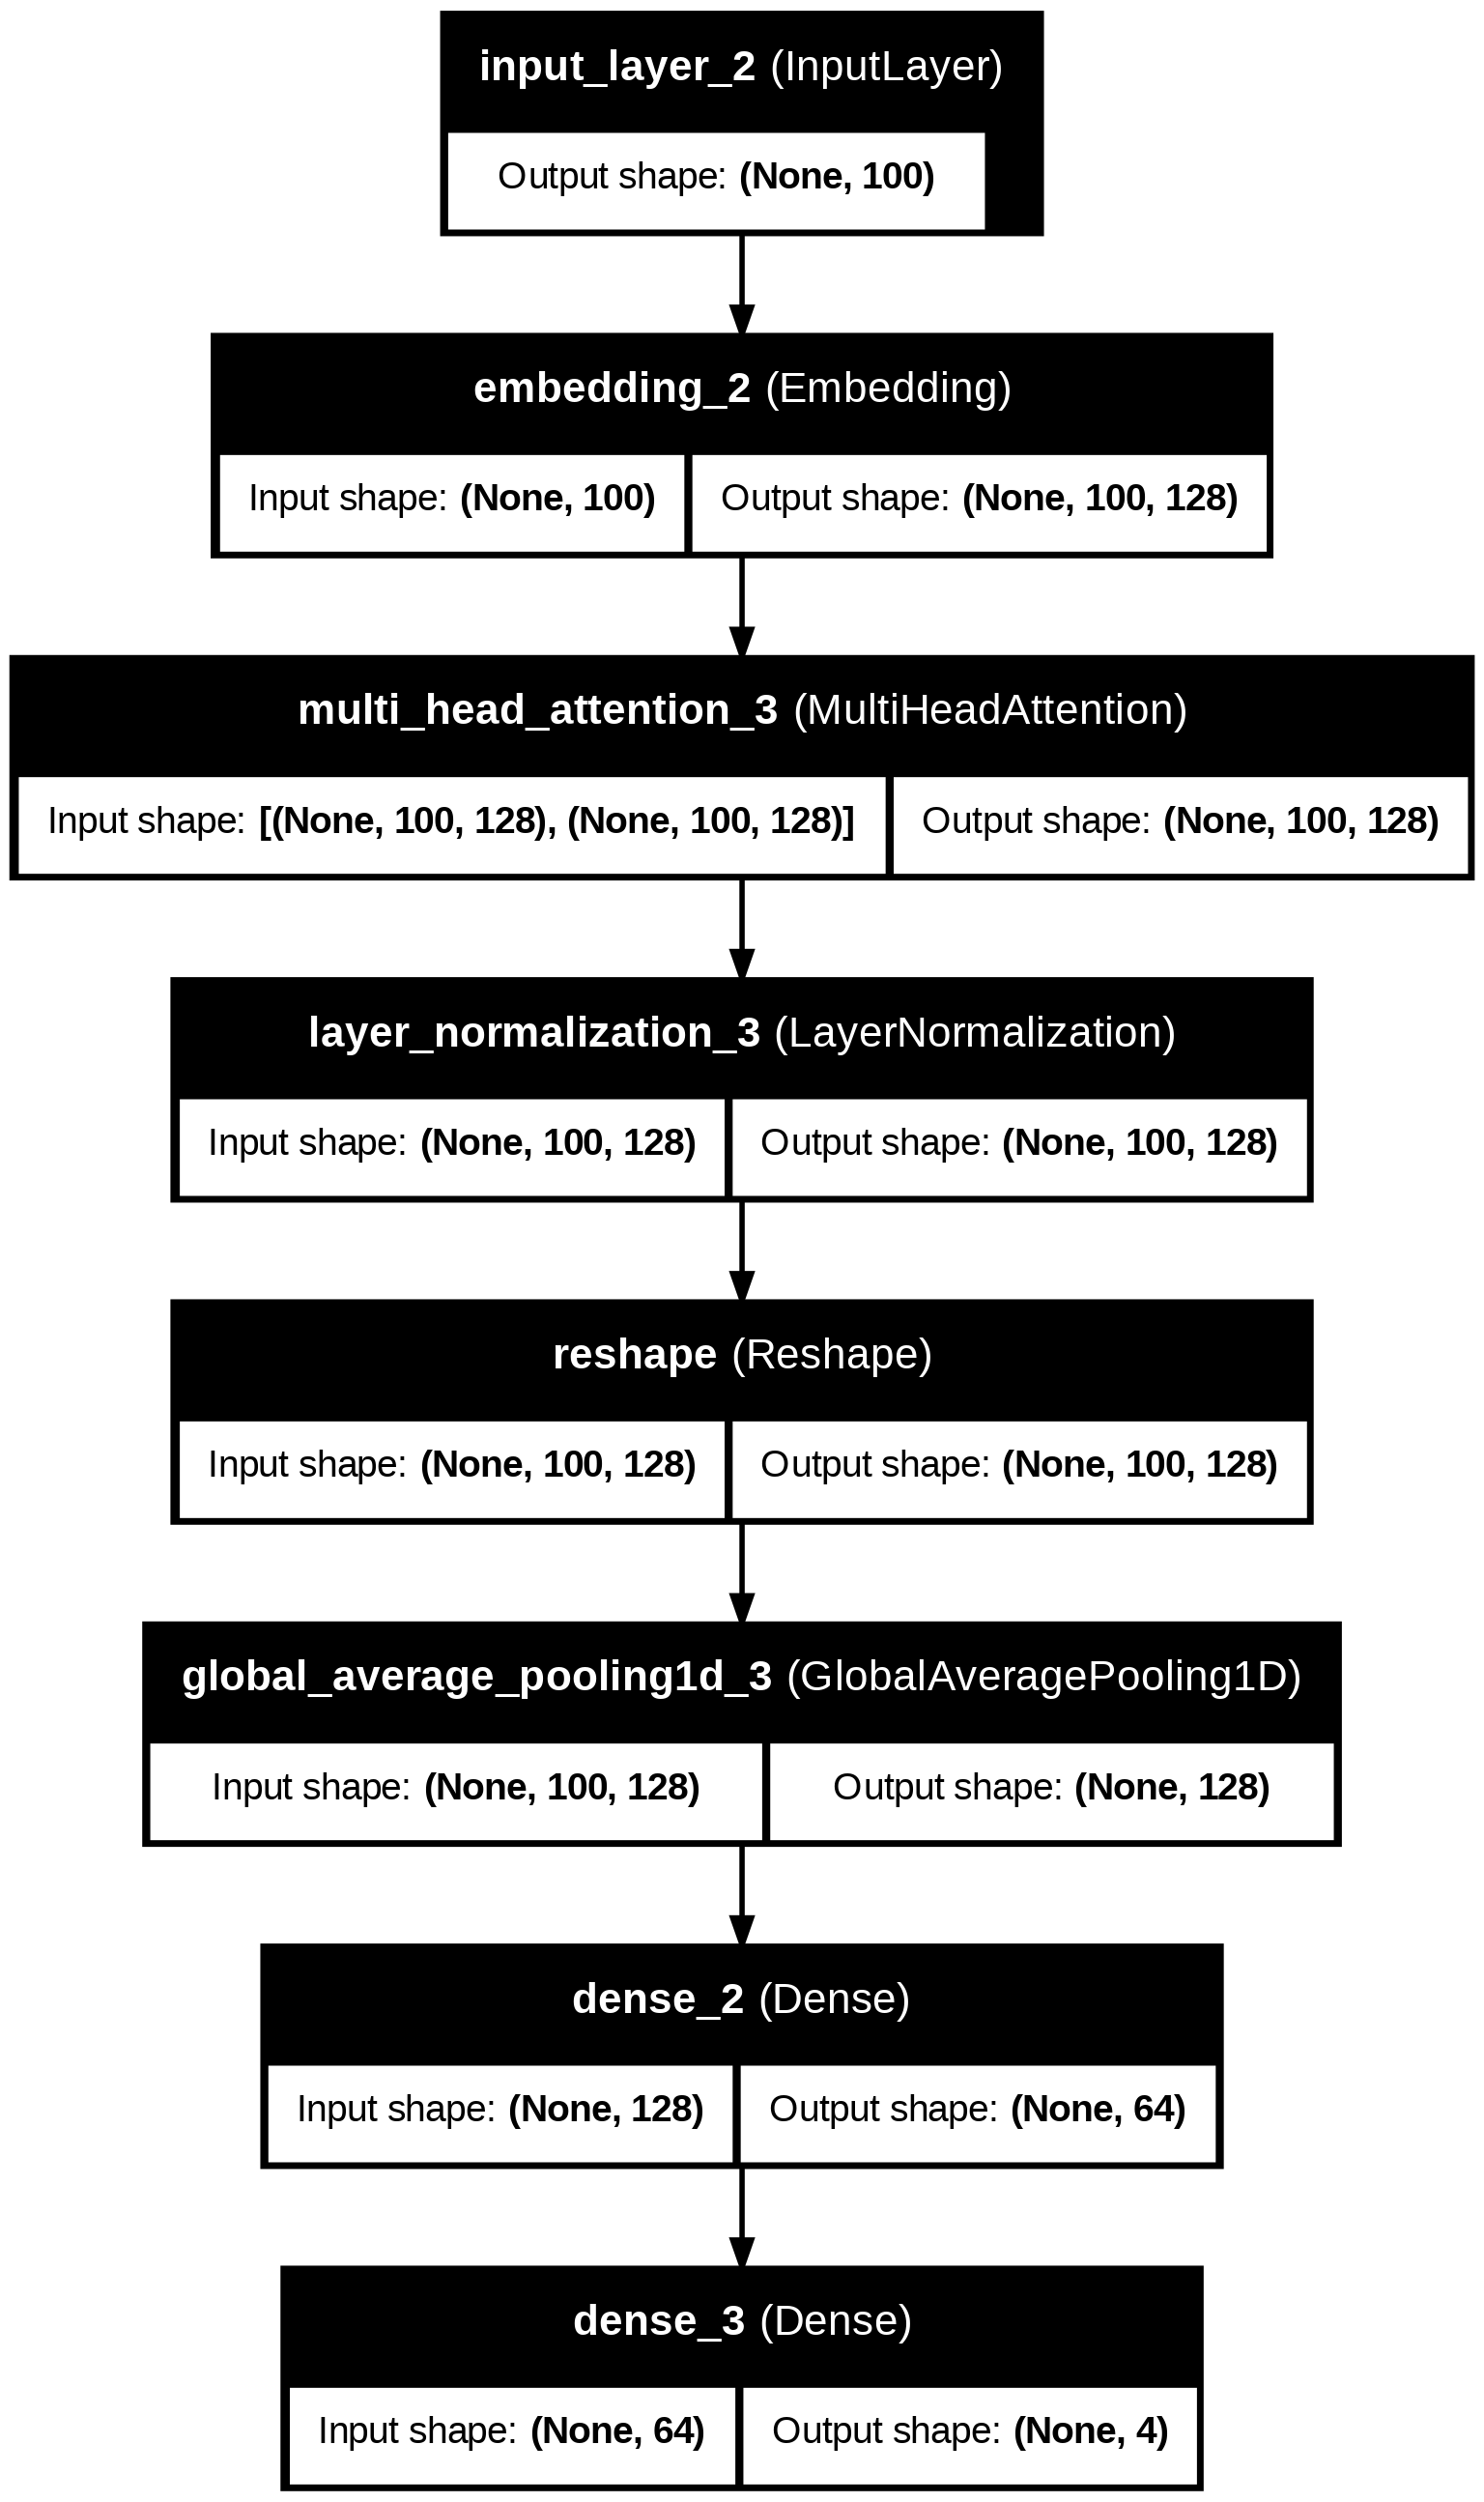

In [15]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

# Cargar el modelo
model_transformer_2multihead_loaded = load_model('/content/drive/MyDrive/Deep Learning/Proyecto1/Proyect/modelo_transformer_2multihead.h5')

# Guardar el diagrama en un lugar accesible
output_path = "/content/modelo_transformer_2multihead.png"
plot_model(model_transformer_2multihead_loaded, to_file=output_path, show_shapes=True, show_layer_names=True)

238/238 ━━━━━━━━━━━━━━━━━━━━ 33s 136ms/step


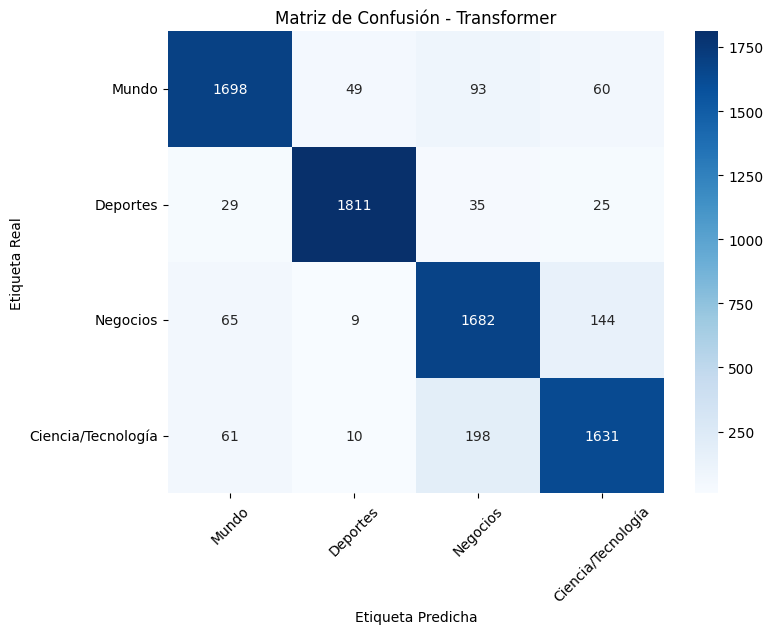

                    precision    recall  f1-score   support

             Mundo       0.92      0.89      0.90      1900
          Deportes       0.96      0.95      0.96      1900
          Negocios       0.84      0.89      0.86      1900
Ciencia/Tecnología       0.88      0.86      0.87      1900

          accuracy                           0.90      7600
         macro avg       0.90      0.90      0.90      7600
      weighted avg       0.90      0.90      0.90      7600



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Definir las clases
clases = {0: 'Mundo', 1: 'Deportes', 2: 'Negocios', 3: 'Ciencia/Tecnología'}

# Paso 1: Predecir etiquetas de clase
y_pred_probs = model_transformer_2multihead_loaded.predict(X_test_pad)  # Obtiene probabilidades de cada clase
y_pred = np.argmax(y_pred_probs, axis=1)  # Convierte a etiquetas enteras

# Paso 2: Convertir y_test_one_hot a etiquetas enteras
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Paso 3: Generar la matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred)

# Paso 4: Graficar la matriz de confusión con etiquetas correctas
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[clases[i] for i in np.unique(y_test_labels)],
            yticklabels=[clases[i] for i in np.unique(y_test_labels)])
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión - Transformer")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad
plt.yticks(rotation=0)
plt.show()

# Reporte de clasificación (precisión, recall, F1-score)
print(classification_report(y_test_labels, y_pred, target_names=[clases[i] for i in np.unique(y_test_labels)]))